<div style='color: #79d5d5;
           background-color: #f6eaf0;
           font-size: 100%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🤗Few-shot learning is a type of machine learning that focuses on the ability of a model to learn new concepts or tasks with only a small amount of labeled data. Traditional machine learning algorithms typically require a large amount of labeled data to be effective, but in few-shot learning, the goal is to enable a model to learn new concepts with only a handful of labeled examples.

Few-shot learning is often used in scenarios where it is difficult or expensive to obtain large amounts of labeled data, such as in medical diagnosis or industrial quality control. The idea behind few-shot learning is to train a model on a small number of examples that represent a new concept or task, and then use that model to perform well on similar but unseen examples.

To achieve this, few-shot learning typically uses transfer learning, which involves pre-training a model on a large dataset and then fine-tuning it on a smaller, task-specific dataset. Another common approach is to use meta-learning, which involves training a model on multiple tasks and using that knowledge to quickly adapt to new tasks with few examples.

Overall, few-shot learning is an important area of research in machine learning, as it has the potential to enable more efficient and flexible machine learning systems that can adapt to new tasks and domains with only limited amounts of labeled data.
    <a class="anchor" id="8"></a> 


<div style='color: #79d5d5;
           background-color: #f6eaf0;
           font-size: 100%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
🤗SetFit is an efficient and prompt-free framework for few-shot fine-tuning of Sentence Transformers. It achieves high accuracy with little labeled data for instance, with only 8 labeled examples per class. It has a simple Huggingface API, that can be implemented with a few line of code.

"SetFit" is a framework designed specifically for few-shot fine-tuning of "Sentence Transformers". Sentence Transformers are a type of natural language processing model that can generate vector representations of sentences, which can then be used for tasks such as classification or similarity matching.

SetFit is intended to make it easier to fine-tune Sentence Transformers with small amounts of labeled data. The creators of SetFit claim that the framework can achieve high accuracy even with as little as 8 labeled examples per class. This makes it a powerful tool for scenarios where labeled data is scarce or expensive to obtain.

SetFit provides a simple Huggingface API, which is a popular library for natural language processing in Python. The API allows users to fine-tune Sentence Transformers with only a few lines of code, making it accessible to a wide range of users with varying levels of expertise.

Overall, SetFit is intended to be an efficient and accessible tool for few-shot fine-tuning of Sentence Transformers, with the goal of enabling more efficient and effective natural language processing systems that can adapt to new tasks and domains with only a small amount of labeled data.
     see https://github.com/huggingface/setfit
        <a class="anchor" id="8"></a> 


In [1]:
# import:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
from datasets import Dataset

# Install required packages
!pip install sentence_transformers
!pip install setfit

# Import required packages
from sentence_transformers.losses import CosineSimilarityLoss
from setfit import SetFitModel, SetFitTrainer
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

# The above code imports several Python libraries and installs two additional libraries using pip
# numpy is a library for numerical computing in Python.
# pandas is a library for data manipulation and analysis in Python.
# os is a library for interacting with the operating system in Python.
# datasets is a library for working with machine learning datasets in Python.

# sentence_transformers is a library for training and using Sentence Transformers, which are models that can generate vector representations of sentences.
# setfit is a library for few-shot fine-tuning of Sentence Transformers.
# CosineSimilarityLoss is a loss function that can be used to train Sentence Transformers.
# SetFitModel is a class for building SetFit models.
# SetFitTrainer is a class for training SetFit models.
# seaborn is a library for data visualization in Python.
# confusion_matrix is a function from scikit-learn for computing a confusion matrix.
# matplotlib.pyplot is a library for creating visualizations in Python.


In [2]:
# load the data
input_folder = '/kaggle/input/imdb-dataset-of-50k-movie-reviews'
data = pd.read_csv(input_folder+'/IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [4]:
def clean_text(text):
    # Remove any mentions (@) in the text
    text = re.sub(r"@[A-Za-z0-9]+", ' ', text)
    
    # Remove any URLs (http/https) in the text
    text = re.sub(r"https?://[A-Za-z0-9./]+", ' ', text)
    
    # Remove any characters that are not letters, digits, or punctuation
    text = re.sub(r"[^a-zA-z.!?'0-9]", ' ', text)
    
    # Replace any tabs with a space
    text = re.sub('\t', ' ',  text)
    
    # Replace multiple spaces with a single space
    text = re.sub(r" +", ' ', text)
    
    return text

In [5]:
import re
data['review'] = data['review'].apply(clean_text)

In [6]:
# prepare data for setfit api
data = data.rename(columns={'review':'text','sentiment':'label_text'})
data['label'] = data['label_text'].apply(lambda x : 0 if x=='negative' else 1)
# (lazy) train test split 
data_train = Dataset.from_pandas( data.iloc[:50,:])
data_eval =  Dataset.from_pandas(data.iloc[50:100,:])

In [7]:
# load model,make sure that you active GPU for reasonable run time 
model = SetFitModel.from_pretrained("sentence-transformers/paraphrase-mpnet-base-v2")

# This code loads the pre-trained Sentence Transformer model called "paraphrase-mpnet-base-v2" from the Hugging Face model hub.
# It creates a SetFitModel object using the pre-trained model.

# Create trainer
trainer = SetFitTrainer(
    model=model,
    train_dataset=data_train,
    eval_dataset=data_eval,
    loss_class=CosineSimilarityLoss,
    batch_size=8,
    learning_rate = 2e-05,
    num_iterations=40,
    num_epochs=1
)

# This code creates a SetFitTrainer object called 'trainer'.
# It sets the 'model' parameter to the pre-trained Sentence Transformer model.
# It sets the 'train_dataset' and 'eval_dataset' parameters to the datasets created in the previous step.
# It sets the 'loss_class' parameter to the CosineSimilarityLoss class from the sentence_transformers package.
# It sets the 'batch_size' parameter to 8.
# It sets the 'learning_rate' parameter to 2e-05.
# It sets the 'num_iterations' parameter to 40, which is the number of text pairs to generate for contrastive learning.
# It sets the 'num_epochs' parameter to 1, which is the number of epochs to use for contrastive learning.


model_head.pkl not found on HuggingFace Hub, initialising classification head with random weights. You should TRAIN this model on a downstream task to use it for predictions and inference.


In [8]:
trainer.train()  # Fine-tune the model on downstream task for 10 epochs

# Evaluate model performance on evaluation dataset
metrics = trainer.evaluate()

# Print evaluation metrics
print(metrics)

***** Running training *****
  Num examples = 4000
  Num epochs = 1
  Total optimization steps = 500
  Total train batch size = 8


Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Iteration:   0%|          | 0/500 [00:00<?, ?it/s]

Batches:   0%|          | 0/2 [00:00<?, ?it/s]

***** Running evaluation *****


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

{'accuracy': 0.96}


Batches:   0%|          | 0/2 [00:00<?, ?it/s]

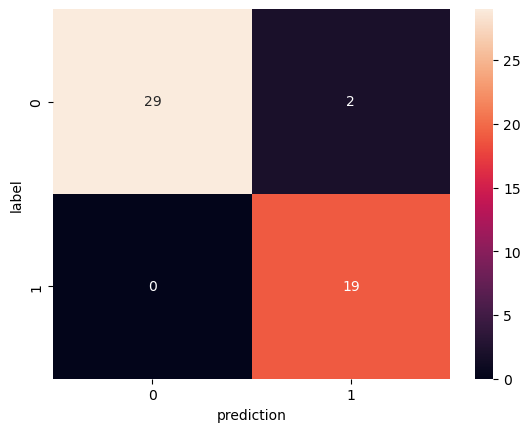

In [9]:
# confusion matrix
test_pred = trainer.model.predict(data_eval['text'])
sns.heatmap(confusion_matrix(data_eval['label'], test_pred), annot=True)
plt.ylabel('label')
plt.xlabel('prediction');



<div style='color: #79d5d5;
           background-color: #f6eaf0;
           font-size: 200%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
THE CONCLUSION
<a class="anchor" id="1"></a> 

<div style='color: #79d5d5;
           background-color: #f6eaf0;
           font-size: 100%;
           border-radius:15px;
           text-align:center;
           font-weight:600;
           border-style: solid;
           border-color: dark green;
           font-family: "Verdana";'>
TO IMPROVE THE ACCURECY YOU CAN 
Increase the number of training epochs: training the model for more epochs can improve its accuracy. You can start with a small number of epochs ( 3-5) and increase it gradually until you see diminishing returns in terms of accuracy.

Increase the batch size: increasing the batch size can improve the model's training efficiency and accuracy. However, increasing the batch size too much can cause out-of-memory errors, especially on GPU-limited systems.

Fine-tune the pre-trained model: SetFit models are based on pre-trained transformer models that have been trained on large datasets. Fine-tuning the pre-trained model on your specific dataset can improve its accuracy on your task.

Experiment with different loss functions: the choice of loss function can affect the performance of the model. You can experiment with different loss functions to find the one that works best for your task.

Use data augmentation techniques: data augmentation can help increase the amount of training data available to the model, which can improve its accuracy. Common data augmentation techniques for text data include random deletion, random swapping, and synonym replacement.

Tune the learning rate: the learning rate controls how much the model's parameters are updated during training. Setting the learning rate too high or too low can lead to poor convergence and accuracy. You can experiment with different learning rates to find the one that works best for your task.

Use ensembling techniques: ensembling multiple models can help improve their accuracy by combining their predictions. You can experiment with ensembling different versions of the SetFit model with different hyperparameters or architectures to improve accuracy.